<a href="https://colab.research.google.com/github/leehj112/Data-Analyses/blob/master/colab_(%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
####선형 회귀 모델 reivew ##

# 실습용 데이터 패키지
from sklearn.datasets import fetch_california_housing

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [60]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [61]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [62]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
california.feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
california.data.shape

(20640, 8)

In [13]:
# 데이터 전처리
# x 독립변수, 예측변수, 입력변수
# y 종속변수, 반응변수, 출력변수

x = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=['target'])


In [14]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [19]:
# Train set/Test set %

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021)


In [36]:
# 선형회귀 모델 가정 확인
x_train = sm.add_constant(x_train)     #  독립변수 x_trian에 상수항 add
model = sm.OLS(y_train, x_train, axis=1)  # 선형회귀 모델 생성
model_trained = model.fit()            # 학습

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'QQ Plot')

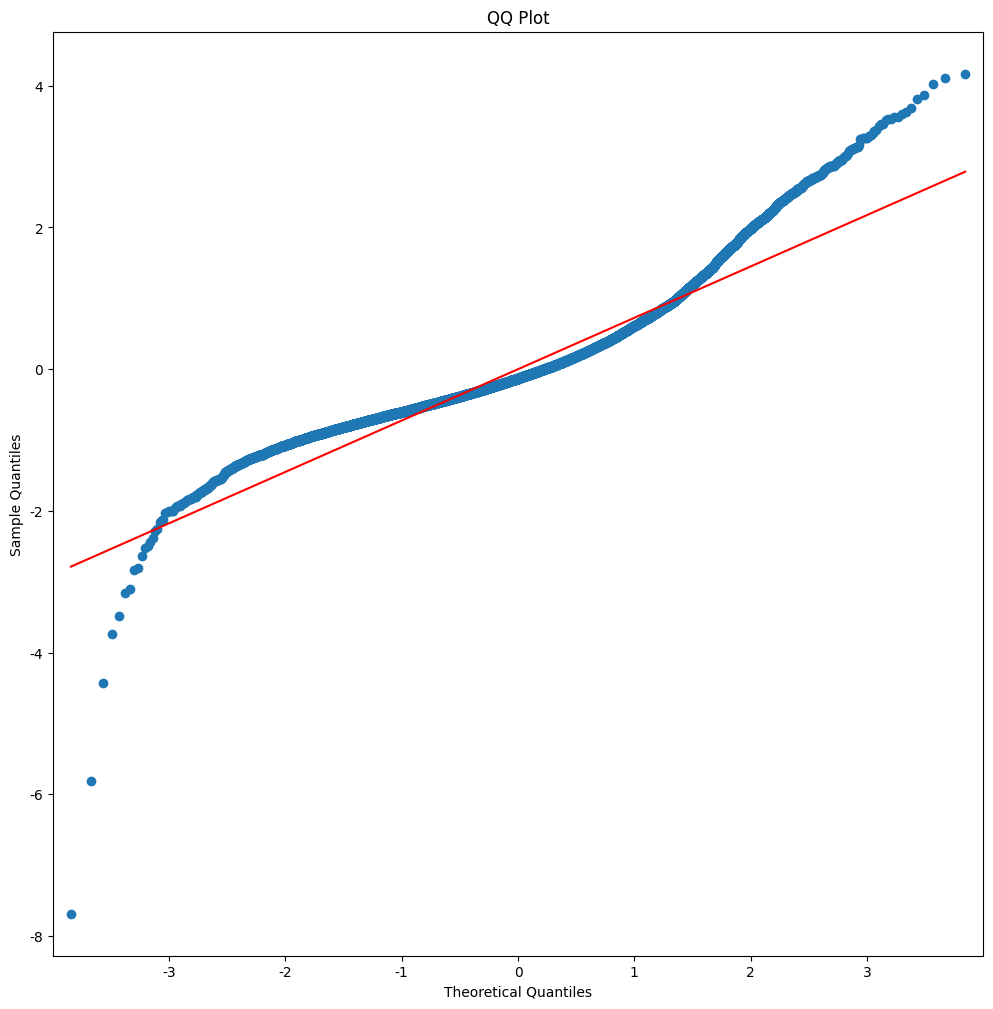

In [40]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)


sm.ProbPlot(model_resiudals).qqplot(line='s', color='#1f77b4',ax=ax)
ax.set_title('QQ Plot')



In [41]:
model_residuals


2782     0.368609
8513    -0.094323
2163    -0.692869
5232    -0.308756
9766     0.609893
           ...   
16347    0.100301
20318   -0.511915
2669    -0.118199
17536   -0.454885
6201     0.348050
Length: 16512, dtype: float64

In [82]:
print(model_trained.summary()) # 통계 해석

# R-squared: 모형의 성능
# coef: x가 한단위 증가할 때 y의 변화량


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2834.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:14:22   Log-Likelihood:                -19892.
No. Observations:               16512   AIC:                         3.980e+04
Df Residuals:                   16505   BIC:                         3.985e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4519      0.379     -3.833      0.0

In [46]:

model = sm.OLS(y_train, x_train.drop(['AveRooms', 'Latitude'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2834.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:29:57   Log-Likelihood:                -19892.
No. Observations:               16512   AIC:                         3.980e+04
Df Residuals:                   16505   BIC:                         3.985e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4519      0.379     -3.833      0.0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

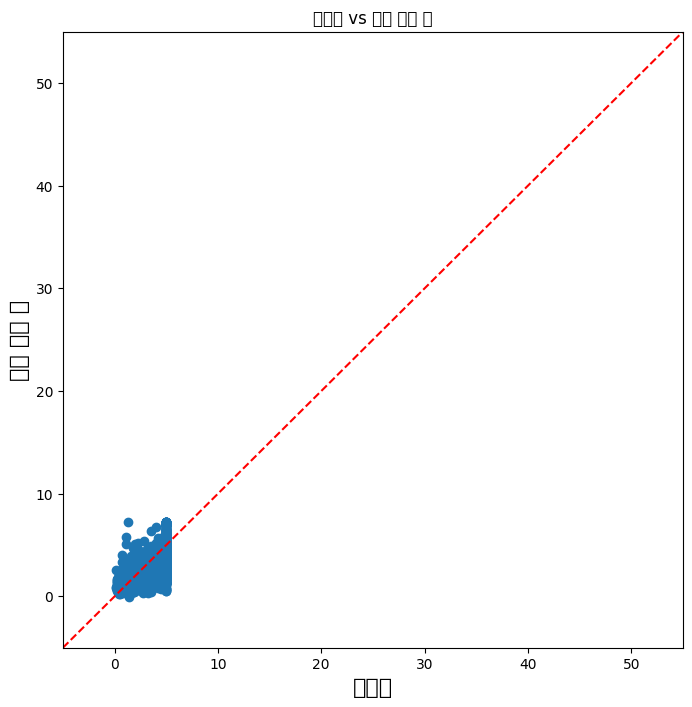

In [49]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title('실제값 vs 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()




In [50]:
x_test = sm.add_constant(x_test)

In [51]:
y_test_pred = model_trained.predict(x_test.drop(['AveRooms', 'Latitude'], axis=1))
y_test_pred.head()

18881    1.803945
16312    1.924956
2169     1.325211
14346    1.543432
5607     1.305139
dtype: float64

In [52]:
# 평균 제곱 오차
print(mean_squared_error(y_test, y_test_pred))

0.6411486307632609


In [53]:
# 제곱근 평균 제곱 오차
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))


0.8007175724081874


In [54]:
# 평균 절대 오차
print(mean_absolute_error(y_test, y_test_pred))


0.5975085490484114


In [56]:
# 평균 절대 백분율 오차
def mean_absolute_precentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np. abs((y_true-y_pred)/y_true))*100

print(mean_absolute_error(y_test, pd.DataFrame(y_test_pred)))


0.5975085490484114


In [57]:
# 결정계수
print(r2_score(y_test, y_test_pred))

0.5308884621633368


In [65]:
print('Training Medinc': {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training HouseAge': {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training AveRooms': {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training Population': {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training R2: 0.507


In [69]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm




In [77]:
lr_skl = LinearRegression(fit_intercept=False)
lr_skl.fit(x_train, y_train)
y_pred_skl = lr_skl.predict(x_test)

lr_stat = sm.OLS(y_train, x_train).fit()
y_pred_stat = lr_stat.predict(x_test)

In [79]:
np.array(y_pred_stat).shape

(4128,)

In [80]:
np.array(y_pred_skl).shape

(4128, 1)